<a href="https://colab.research.google.com/github/faizalram/Diabetes-Classification/blob/main/Capstone_Playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset

In [180]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from datetime import datetime
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [43]:
files = [file for file in os.listdir('/content/drive/MyDrive/Bangkit')]

In [44]:
df = pd.DataFrame()

In [45]:
for file in files:
    data = pd.read_csv('/content/drive/MyDrive/Bangkit/' + file)
    df = pd.concat([df, data])

# Data Cleaning, Wrangling, and Feature Engineering

In [49]:
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,revenue
0,236670,Wired Headphones,2.0,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",NaN,NaN,NaN,NaN
1,236671,Bose SoundSport Headphones,1.0,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",NaN,NaN,NaN,NaN
2,236672,iPhone,1.0,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",NaN,NaN,NaN,NaN
3,236673,AA Batteries (4-pack),2.0,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",NaN,NaN,NaN,NaN
4,236674,AA Batteries (4-pack),2.0,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",NaN,NaN,NaN,NaN


In [50]:
df['Product'].value_counts()

USB-C Charging Cable          87612
Lightning Charging Cable      86632
AAA Batteries (4-pack)        82564
AA Batteries (4-pack)         82308
Wired Headphones              75528
Apple Airpods Headphones      62196
Bose SoundSport Headphones    53300
27in FHD Monitor              30028
iPhone                        27368
27in 4K Gaming Monitor        24920
34in Ultrawide Monitor        24724
Google Phone                  22100
Flatscreen TV                 19200
Macbook Pro Laptop            18896
ThinkPad Laptop               16512
20in Monitor                  16404
Vareebadd Phone                8260
LG Washing Machine             2664
LG Dryer                       2584
Product                        1420
Name: Product, dtype: int64

In [51]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors="coerce")
df['Price Each'] = pd.to_numeric(df['Price Each'], errors="coerce")

Converting order date into datetime data type with yyyy-mm-dd hh:mm format

In [52]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors = 'coerce')

In [53]:
df = df.astype({'Price Each':'float'})

Creating new feature, extracting different types of time value from the order date variable

In [54]:
df['revenue'] = df['Quantity Ordered'] * df['Price Each']

In [55]:
df['revenue'] = df['Quantity Ordered'] * df['Price Each']
df['hour'] = df['Order Date'].dt.hour
df['dayofweek'] = df['Order Date'].dt.dayofweek
df['quarter'] = df['Order Date'].dt.quarter
df['month'] = df['Order Date'].dt.month
df['year'] = df['Order Date'].dt.year
df['dayofyear'] = df['Order Date'].dt.dayofyear
df['dayofmonth'] = df['Order Date'].dt.day
df['weekofyear'] = df['Order Date'].dt.isocalendar().week

Encoding product name into categorical number

In [56]:
temp_product = set(df["Product"])
product_dict = dict()
i = 0
for x in temp_product:
    product_dict[i]=x
    i+=1
new_dict =  {v: k for k, v in product_dict.items()}

def to_num(s):

    return new_dict[s[1]]
df['Product'] = df.apply(to_num, axis=1)

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,revenue,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
0,236670,4,2.0,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",NaN,NaN,NaN,23.98,22.0,5.0,3.0,8.0,2019.0,243.0,31.0,35
1,236671,18,1.0,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",NaN,NaN,NaN,99.99,15.0,3.0,3.0,8.0,2019.0,227.0,15.0,33
2,236672,7,1.0,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",NaN,NaN,NaN,700.00,14.0,1.0,3.0,8.0,2019.0,218.0,6.0,32
3,236673,6,2.0,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",NaN,NaN,NaN,7.68,20.0,3.0,3.0,8.0,2019.0,241.0,29.0,35
4,236674,6,2.0,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",NaN,NaN,NaN,7.68,19.0,3.0,3.0,8.0,2019.0,227.0,15.0,33


In [122]:
features = ["Order Date", "Product", "hour","dayofweek", "quarter", "month", "year", "dayofyear","Quantity Ordered","dayofmonth", "weekofyear"]

In [123]:
data = pd.DataFrame(df.groupby(features)['revenue'].sum(),
                          columns=["revenue"])
data["revenue"] = df.groupby(features).revenue.sum()
data = data.reset_index()

Cleaned and prepared dataframe

In [126]:
data['Product'].value_counts()

16    21339
13    21098
3     20355
6     20213
4     18436
8     15191
18    13081
2      7415
7      6771
19     6165
1      6125
5      5478
20     4755
11     4696
15     4107
14     4077
17     2064
9       664
0       646
Name: Product, dtype: int64

In [127]:
df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20 = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()


d_list = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20]

def create_df(data):
  for x in range(0,20):
    temp_df = data.loc[data['Product'] == x+1]
    d_list[x] = temp_df
  return d_list

In [128]:
d_list = create_df(data)

In [129]:
d_list[15]

,Order Date,Product,hour,dayofweek,quarter,month,year,dayofyear,Quantity Ordered,dayofmonth,weekofyear,revenue
1,2019-01-01 03:40:00,16,3.0,1.0,1.0,1.0,2019.0,1.0,1.0,1.0,1,47.8
4,2019-01-01 06:03:00,16,6.0,1.0,1.0,1.0,2019.0,1.0,2.0,1.0,1,95.6
17,2019-01-01 07:47:00,16,7.0,1.0,1.0,1.0,2019.0,1.0,1.0,1.0,1,47.8
34,2019-01-01 09:36:00,16,9.0,1.0,1.0,1.0,2019.0,1.0,1.0,1.0,1,47.8
37,2019-01-01 09:48:00,16,9.0,1.0,1.0,1.0,2019.0,1.0,1.0,1.0,1,47.8
...,...,...,...,...,...,...,...,...,...,...,...,...
182628,2019-12-31 23:16:00,16,23.0,1.0,4.0,12.0,2019.0,365.0,2.0,31.0,1,95.6
182653,2020-01-01 00:59:00,16,0.0,2.0,1.0,1.0,2020.0,1.0,1.0,1.0,1,47.8
182661,2020-01-01 01:52:00,16,1.0,2.0,1.0,1.0,2020.0,1.0,1.0,1.0,1,47.8
182667,2020-01-01 03:13:00,16,3.0,2.0,1.0,1.0,2020.0,1.0,1.0,1.0,1,47.8


In [130]:
dfp = d_list[15]

In [131]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21339 entries, 1 to 182672
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order Date        21339 non-null  datetime64[ns]
 1   Product           21339 non-null  int64         
 2   hour              21339 non-null  float64       
 3   dayofweek         21339 non-null  float64       
 4   quarter           21339 non-null  float64       
 5   month             21339 non-null  float64       
 6   year              21339 non-null  float64       
 7   dayofyear         21339 non-null  float64       
 8   Quantity Ordered  21339 non-null  float64       
 9   dayofmonth        21339 non-null  float64       
 10  weekofyear        21339 non-null  UInt32        
 11  revenue           21339 non-null  float64       
dtypes: UInt32(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 2.1 MB


In [132]:
dfp = dfp.groupby(['dayofyear'])['Quantity Ordered'].sum()

In [133]:
dfp

dayofyear
1.0       44.0
2.0       36.0
3.0       43.0
4.0       57.0
5.0       30.0
         ...  
361.0    106.0
362.0     98.0
363.0    109.0
364.0    106.0
365.0    101.0
Name: Quantity Ordered, Length: 365, dtype: float64

Splitting dataframe for training and testing

In [134]:
from numpy import asarray
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return asarray(X), asarray(y)

In [135]:
n_steps = 5

In [136]:
dfp = dfp.values.astype('float32')

In [137]:
X, y = split_sequence(dfp, n_steps)

In [138]:
X = X.reshape((X.shape[0], X.shape[1], 1))

In [139]:
n_test = 365-292
X_train, X_test, y_train, y_test = X[:-n_test], X[-n_test:], y[:-n_test], y[-n_test:]

In [140]:
model = Sequential()
model.add(LSTM(100, activation='relu', kernel_initializer='he_normal', input_shape=(n_steps,1)))
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))

In [141]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(X_train, y_train, epochs=350, batch_size=32, verbose=1, validation_data=(X_test, y_test))

Epoch 1/350
9/9 [==============================] - 3s 45ms/step - loss: 316.0189 - mae: 13.8863 - val_loss: 165.8315 - val_mae: 10.1422
Epoch 2/350
9/9 [==============================] - 0s 11ms/step - loss: 173.9129 - mae: 10.3587 - val_loss: 115.5493 - val_mae: 8.2011
Epoch 3/350
9/9 [==============================] - 0s 10ms/step - loss: 116.6921 - mae: 8.4912 - val_loss: 129.9753 - val_mae: 9.2583
Epoch 4/350
9/9 [==============================] - 0s 12ms/step - loss: 105.5755 - mae: 8.0798 - val_loss: 101.3339 - val_mae: 7.9247
Epoch 5/350
9/9 [==============================] - 0s 12ms/step - loss: 97.1671 - mae: 7.7529 - val_loss: 99.9732 - val_mae: 7.7917
Epoch 6/350
9/9 [==============================] - 0s 9ms/step - loss: 97.0433 - mae: 7.7038 - val_loss: 106.0669 - val_mae: 7.8389
Epoch 7/350
9/9 [==============================] - 0s 9ms/step - loss: 95.1272 - mae: 7.6592 - val_loss: 113.7790 - val_mae: 8.4025
Epoch 8/350
9/9 [==============================] - 0s 9ms/step - 

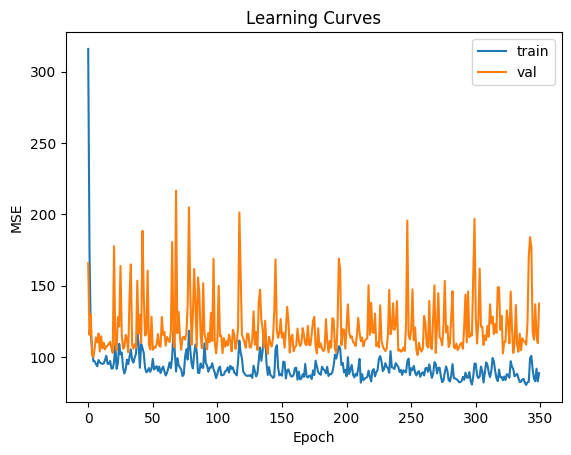

In [142]:
import matplotlib.pyplot as plt
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.plot(model.history.history['loss'], label='train')
plt.plot(model.history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [143]:
from numpy import sqrt
mse, mae = model.evaluate(X_test, y_test, verbose=0)
print('MSE: %.3f, RMSE: %.3f, MAE: %.3f' % (mse, sqrt(mse), mae))

MSE: 137.532, RMSE: 11.727, MAE: 9.462


In [144]:
pred = model.predict(X_test)

3/3 [==============================] - 0s 4ms/step


In [145]:
y_test = y_test.reshape((y_test.shape[0]))

In [146]:
pred = pred.reshape(pred.shape[0])

In [147]:
dic = {'Predictions': pred,'Actual' : y_test, 'Diff': pred - y_test}

In [148]:
pred = pd.DataFrame(data=dic)

In [149]:
pred

,Predictions,Actual,Diff
0,93.060356,85.0,8.060356
1,94.132233,86.0,8.132233
2,92.205666,82.0,10.205666
3,91.316811,73.0,18.316811
4,89.203644,95.0,-5.796356
...,...,...,...
68,116.105904,106.0,10.105904
69,118.509453,98.0,20.509453
70,115.538689,109.0,6.538689
71,115.303856,106.0,9.303856


In [150]:
model.save('/content/drive/MyDrive/Bangkit/Model/model',save_format='tf')
# loading the saved model
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/Bangkit/Model/model')

In [151]:
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/Bangkit/Model/model')

In [165]:
def new_data(data):
  df = data
  df = df.groupby(['dayofyear'])['Quantity Ordered'].sum()
  df = df.values.astype('float32')

  n_steps = 5
  n_test = 365-292

  X, y = split_sequence(df, n_steps)
  X = X.reshape((X.shape[0], X.shape[1], 1))
  X_train, X_test, y_train, y_test = X[:-n_test], X[-n_test:], y[:-n_test], y[-n_test:]

  return X_train, X_test, y_train, y_test

In [166]:
X_train, X_test, y_train, y_test = new_data(d_list[0])

In [184]:
def train_new_model(data):
  for x in data:
    try:
      new_data(x)
      model.fit(X_train, y_train, epochs=350, batch_size=32, verbose=1, validation_data=(X_test, y_test))
      mse, mae = model.evaluate(X_test, y_test, verbose=0)
      print('MSE: %.3f, RMSE: %.3f, MAE: %.3f' % (mse, sqrt(mse), mae))
    except IndexError:
      continue
  return model

In [185]:
model = train_new_model(d_list)

Streaming output truncated to the last 5000 lines.
Epoch 305/350
9/9 [==============================] - 0s 17ms/step - loss: 0.0210 - mae: 0.1081 - val_loss: 40.8421 - val_mae: 4.7509
Epoch 306/350
9/9 [==============================] - 0s 17ms/step - loss: 0.0269 - mae: 0.1217 - val_loss: 41.5284 - val_mae: 4.8758
Epoch 307/350
9/9 [==============================] - 0s 19ms/step - loss: 0.0193 - mae: 0.1059 - val_loss: 40.3076 - val_mae: 4.7287
Epoch 308/350
9/9 [==============================] - 0s 18ms/step - loss: 0.0381 - mae: 0.1293 - val_loss: 40.2767 - val_mae: 4.7010
Epoch 309/350
9/9 [==============================] - 0s 18ms/step - loss: 0.1000 - mae: 0.2014 - val_loss: 41.7599 - val_mae: 4.9167
Epoch 310/350
9/9 [==============================] - 0s 18ms/step - loss: 0.1951 - mae: 0.3044 - val_loss: 39.8789 - val_mae: 4.6223
Epoch 311/350
9/9 [==============================] - 0s 19ms/step - loss: 0.1895 - mae: 0.3178 - val_loss: 40.7257 - val_mae: 4.7086
Epoch 312/350
9/9 

In [187]:
model.save('/content/drive/MyDrive/Bangkit/Model/model_baru',save_format='tf')

In [189]:
mse, mae = model.evaluate(X_test, y_test, verbose=0)
print('MSE: %.3f, RMSE: %.3f, MAE: %.3f' % (mse, sqrt(mse), mae))

MSE: 41.780, RMSE: 6.464, MAE: 4.979


In [219]:
X_train, X_test, y_train, y_test = new_data(d_list[9])

,Order Date,Product,hour,dayofweek,quarter,month,year,dayofyear,Quantity Ordered,dayofmonth,weekofyear,revenue


In [213]:
mse, mae = model.evaluate(X_test, y_test, verbose=0)

In [220]:
for i in range(0,19):
  try:
    X_train, X_test, y_train, y_test = new_data(d_list[i])
    mse, mae = model.evaluate(X_test, y_test, verbose=0)
    print('Dataset %.1f MSE: %.3f, RMSE: %.3f, MAE: %.3f' % (i+1, mse, sqrt(mse), mae))
  except IndexError:
    continue

Dataset 1.0 MSE: 41.780, RMSE: 6.464, MAE: 4.979
Dataset 2.0 MSE: 71.683, RMSE: 8.467, MAE: 6.865
Dataset 3.0 MSE: 1623.427, RMSE: 40.292, MAE: 32.317
Dataset 4.0 MSE: 626.790, RMSE: 25.036, MAE: 20.585
Dataset 5.0 MSE: 44.837, RMSE: 6.696, MAE: 5.265
Dataset 6.0 MSE: 1121.589, RMSE: 33.490, MAE: 29.216
Dataset 7.0 MSE: 88.732, RMSE: 9.420, MAE: 7.771
Dataset 8.0 MSE: 344.255, RMSE: 18.554, MAE: 15.556
Dataset 9.0 MSE: 22.017, RMSE: 4.692, MAE: 4.184
Dataset 11.0 MSE: 36.038, RMSE: 6.003, MAE: 4.741
Dataset 13.0 MSE: 810.266, RMSE: 28.465, MAE: 24.110
Dataset 14.0 MSE: 25.965, RMSE: 5.096, MAE: 4.165
Dataset 15.0 MSE: 33.437, RMSE: 5.782, MAE: 4.383
Dataset 16.0 MSE: 867.995, RMSE: 29.462, MAE: 25.330
Dataset 17.0 MSE: 23.718, RMSE: 4.870, MAE: 3.818
Dataset 18.0 MSE: 264.660, RMSE: 16.268, MAE: 13.495
Dataset 19.0 MSE: 46.964, RMSE: 6.853, MAE: 5.574


In [222]:
model.save('/content/drive/MyDrive/Bangkit/Model/model_baru',save_format='h5')

IsADirectoryError: ignored

In [223]:
tf.keras.models.save_model(model, '/content/drive/MyDrive/Bangkit/Model/model.pbtxt')

In [228]:
converter = tf.lite.TFLiteConverter.from_keras_model(model=model)

converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.experimental_new_converter=True
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS,
tf.lite.OpsSet.SELECT_TF_OPS]

In [229]:
model_tflite = converter.convert()

In [231]:
open('/content/drive/MyDrive/Bangkit/Model/LSTMModel.tflite', 'wb').write(model_tflite)

62680